In [115]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [116]:
# Loading data
DF = pd.read_csv("adult-all.csv")

In [117]:
DF.head()

,age,workclass,fnlwgt,education,education-num,marital-status:,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [118]:
# Part A: Data Cleaning:

# Dropping insignificant variable
DF = DF.drop('fnlwgt', axis=1)

In [119]:
# Checking for NULL
DF.isnull().sum()

age                0
workclass          0
education          0
education-num      0
marital-status:    0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
Salary             0
dtype: int64

In [120]:
# Counting zeroes to understand skewness
# Count the number of zero values in the specified column
zero_count_gain = (DF['capital-gain'] == 0).sum()

# Calculate the percentage of zero values
percentage_zero_gain = (zero_count_gain / len(DF)) * 100
print(f"Percentage of zero values in 'capital-gain' is: {percentage_zero_gain:.2f}%")

Percentage of zero values in 'capital-gain' is: 91.74%


In [121]:
# Count the number of zero values in the specified column
zero_count_loss = (DF['capital-loss'] == 0).sum()

# Calculate the percentage of zero values
percentage_zero_loss = (zero_count_loss / len(DF)) * 100
print(f"Percentage of zero values in 'capital-loss' is: {percentage_zero_loss:.2f}%")

Percentage of zero values in 'capital-loss' is: 95.33%


In [122]:
# Replace '?' with the mode of the column
DF['native-country'] = DF['native-country'].replace('?', DF["native-country"].mode()[0])
DF['workclass'] = DF['workclass'].replace('?', DF["workclass"].mode()[0])
DF['occupation'] = DF['occupation'].replace('?', DF["occupation"].mode()[0])

In [123]:
# Outliers Detection

# List of numerical columns
numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']

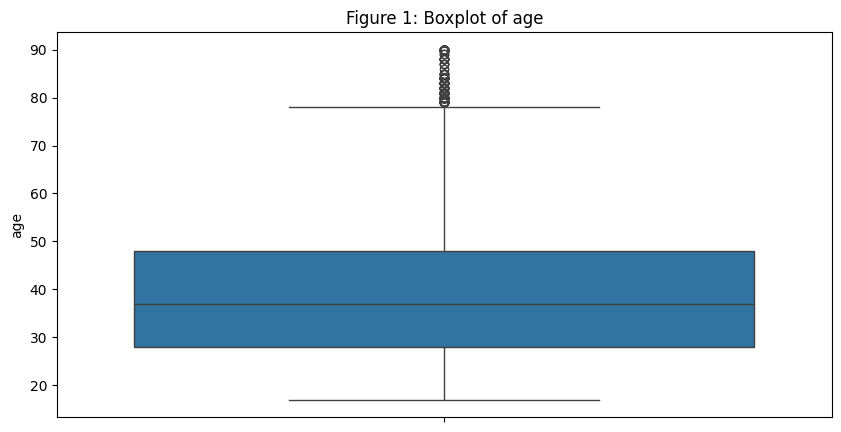

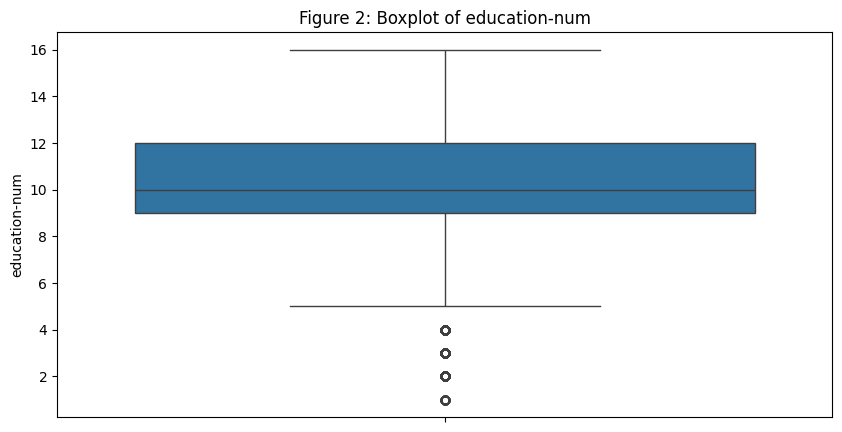

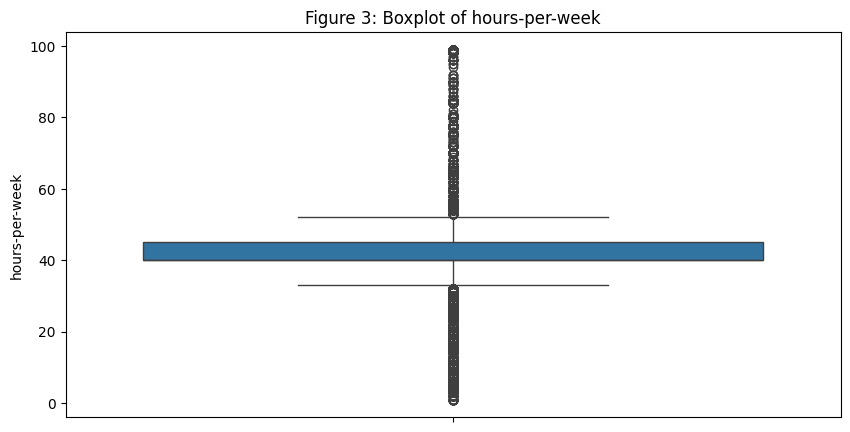

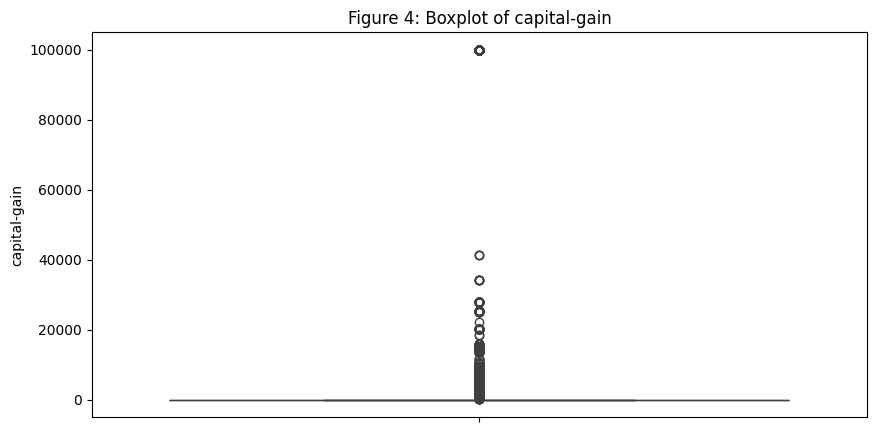

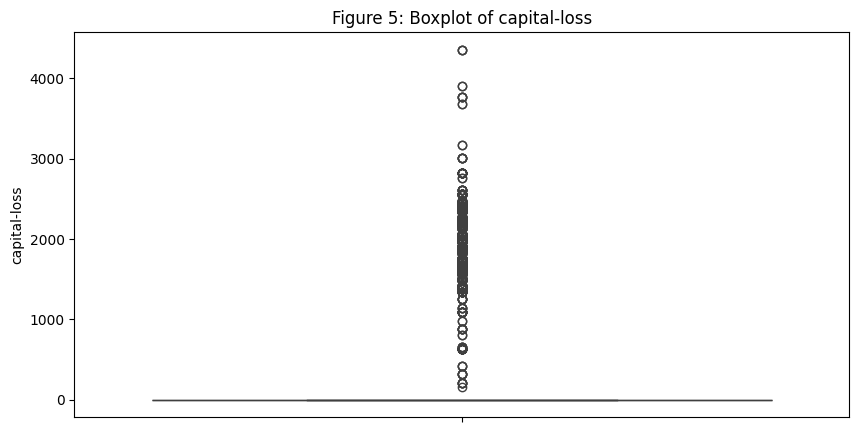

In [124]:
# Bboxplots for numerical features to visualize the outliers
for i, col in enumerate(numerical_cols, 1):
    plt.figure(figsize=(10, 5))
    sns.boxplot(DF[col])
    plt.title(f'Figure {i}: Boxplot of {col}')
    plt.show()   

In [125]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   education-num    48842 non-null  int64 
 4   marital-status:  48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  Salary           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [126]:
# Data Exploration
DF['Income'] = (DF['Salary'] == '<=50K').astype(int)
DF.head(10)

,age,workclass,education,education-num,marital-status:,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,1
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0


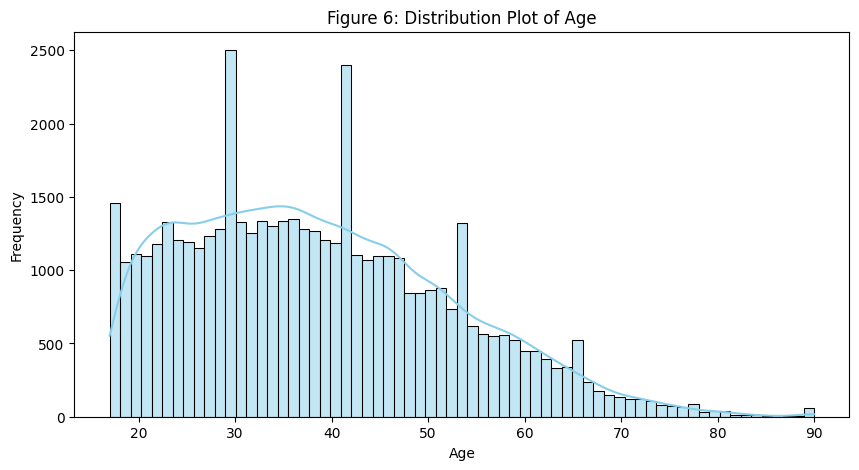

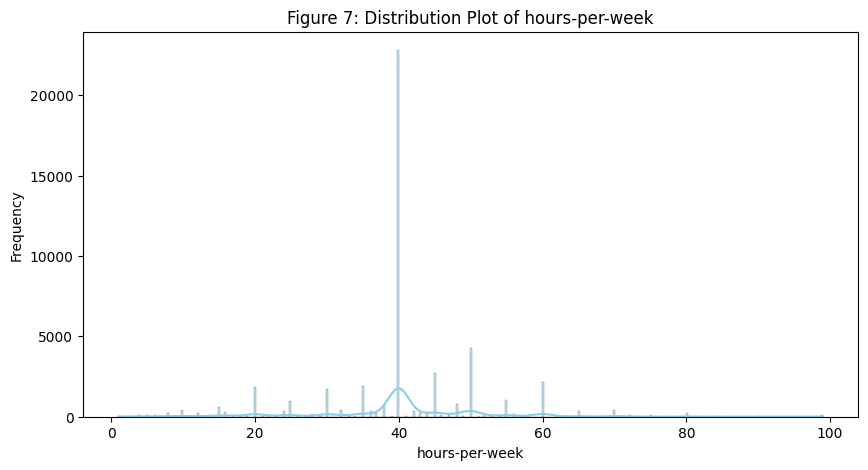

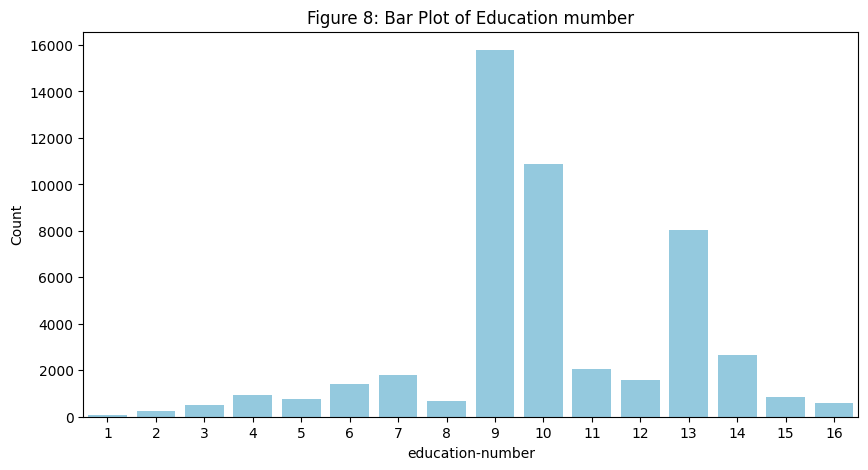

In [127]:
# NUMERICAL VARIABLES:   
# age distribution    
plt.figure(figsize=(10, 5))
sns.histplot(DF['age'], kde=True, color='skyblue')
plt.title('Figure 6: Distribution Plot of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Working hour distribution histogram    
plt.figure(figsize=(10, 5))
sns.histplot(DF['hours-per-week'], kde=True, color='skyblue')
plt.title('Figure 7: Distribution Plot of hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('Frequency')
plt.show()

# Working hour distribution education-nummber
plt.figure(figsize=(10, 5))
sns.countplot(x=DF['education-num'], color='skyblue')
plt.title('Figure 8: Bar Plot of Education mumber')
plt.xlabel('education-number')
plt.ylabel('Count')
plt.show()

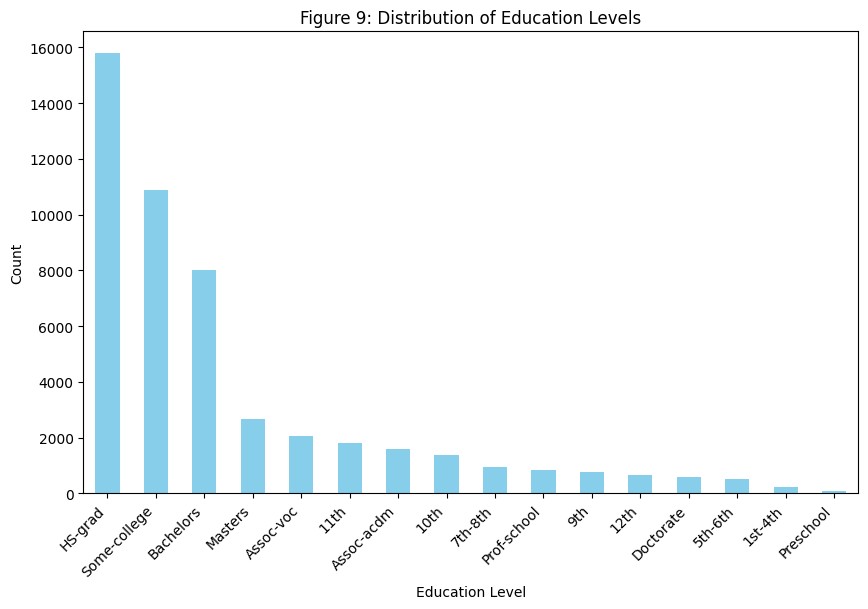

In [128]:
# CATEGORICAL VARIABLES:
# Create a bar plot
#1. Education
DF['education'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Education Level') # Adding labels and title
plt.ylabel('Count')
plt.title('Figure 9: Distribution of Education Levels')
plt.xticks(rotation=45, ha='right')
plt.show()



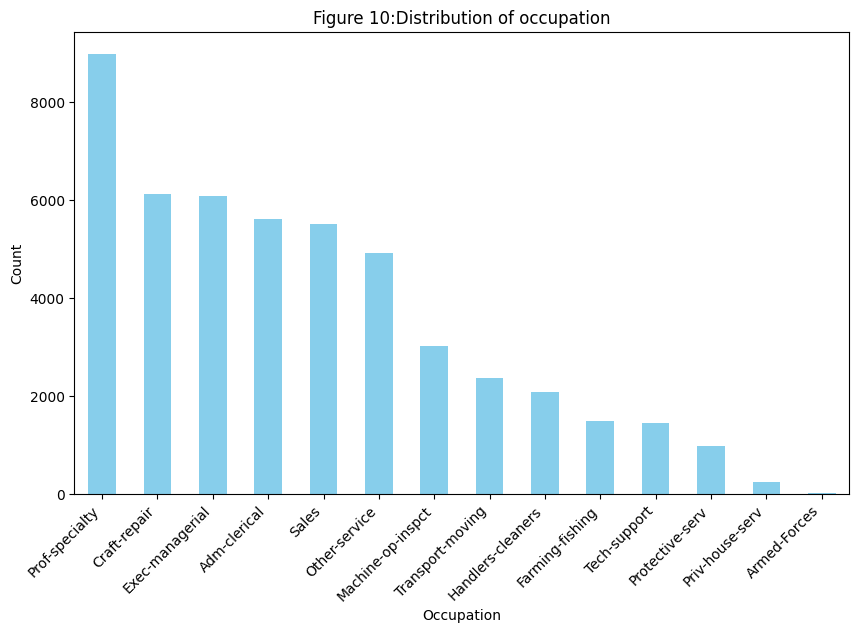

In [129]:
#2. Occupation
DF['occupation'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Occupation') # Adding labels and title
plt.ylabel('Count')
plt.title('Figure 10:Distribution of occupation')
plt.xticks(rotation=45, ha='right')
plt.show()



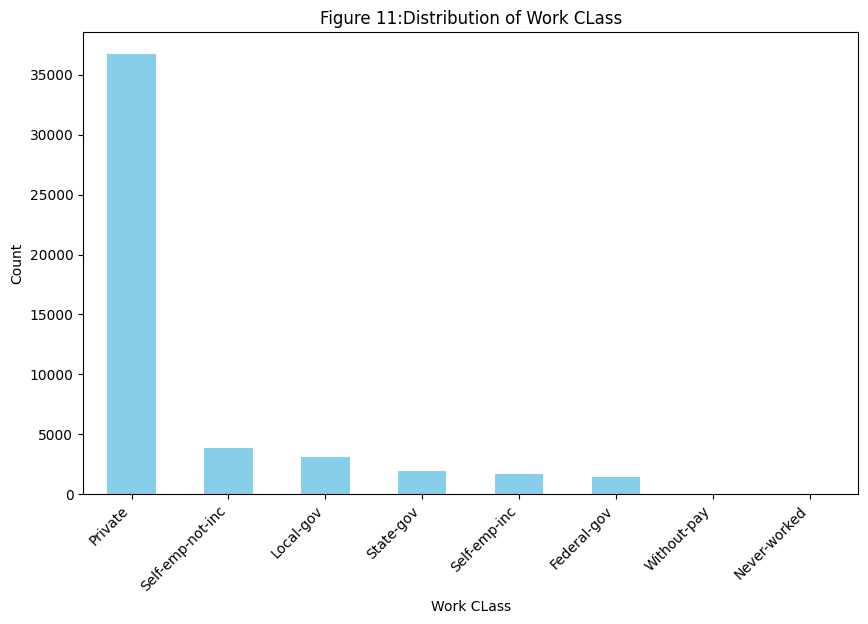

In [102]:
#3. Work CLass
DF['workclass'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Work CLass') # Adding labels and title
plt.ylabel('Count')
plt.title('Figure 11:Distribution of Work CLass')
plt.xticks(rotation=45, ha='right')
plt.show()

In [130]:
# Converting categorical variable education to numerical
education_categories = {
    'Basic': ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad'],
    'Associate': ['Assoc-acdm', 'Assoc-voc'],
    'College': ['Some-college'],
    'Bachelors': ['Bachelors'],
    'Masters/Doctorate': ['Masters', 'Doctorate']
}

# Map the education levels to categories
DF['Ed_Category'] = DF['education'].apply(lambda x: next((value for value, categories in enumerate(education_categories, start=1) if x in categories), 1))
print(DF[['education', 'Ed_Category']].head())

# Converting categorical variable Occupation to numerical
Job_cat = {
    'Tech-support': 1,'Craft-repair': 2,'Other-service': 3,'Sales': 4,'Exec-managerial': 5,'Prof-specialty': 6,
    'Handlers-cleaners': 7,'Machine-op-inspct': 8,'Adm-clerical': 9,'Farming-fishing': 10,'Transport-moving': 11,
    'Priv-house-serv': 12,'Protective-serv': 13,'Armed-Forces': 14
}

# Map the occupation values to numerical categories
DF['Job_cat'] = DF['occupation'].map(Job_cat)
print(DF[['occupation', 'Job_cat']].head())



   education  Ed_Category
0  Bachelors            4
1  Bachelors            4
2    HS-grad            1
3       11th            1
4  Bachelors            4
          occupation  Job_cat
0       Adm-clerical        9
1    Exec-managerial        5
2  Handlers-cleaners        7
3  Handlers-cleaners        7
4     Prof-specialty        6


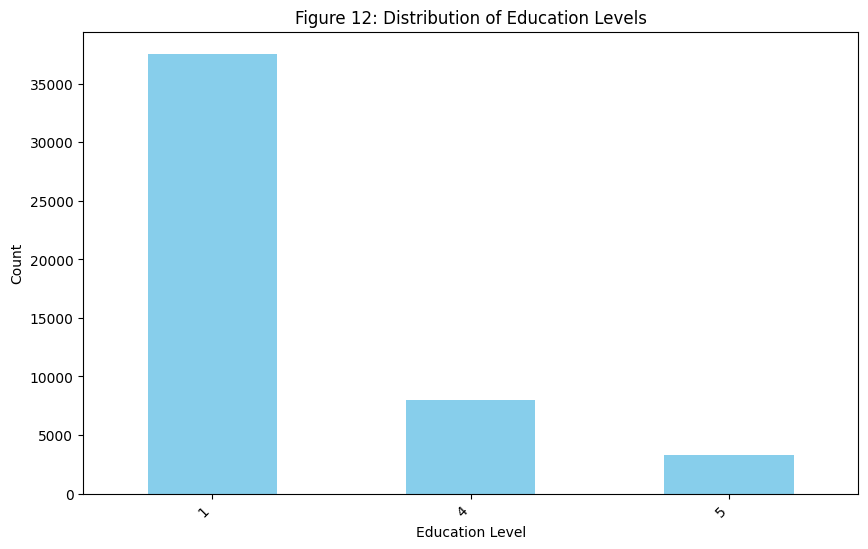

In [104]:
# Create a bar plot
#1. Education
DF['Ed_Category'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Education Level') # Adding labels and title
plt.ylabel('Count')
plt.title('Figure 12: Distribution of Education Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

In [105]:
DF.head()

,age,workclass,education,education-num,marital-status:,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary,Income,Ed_Category,Job_cat
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,4,9
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,4,5
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,1,7
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,1,7
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,4,6


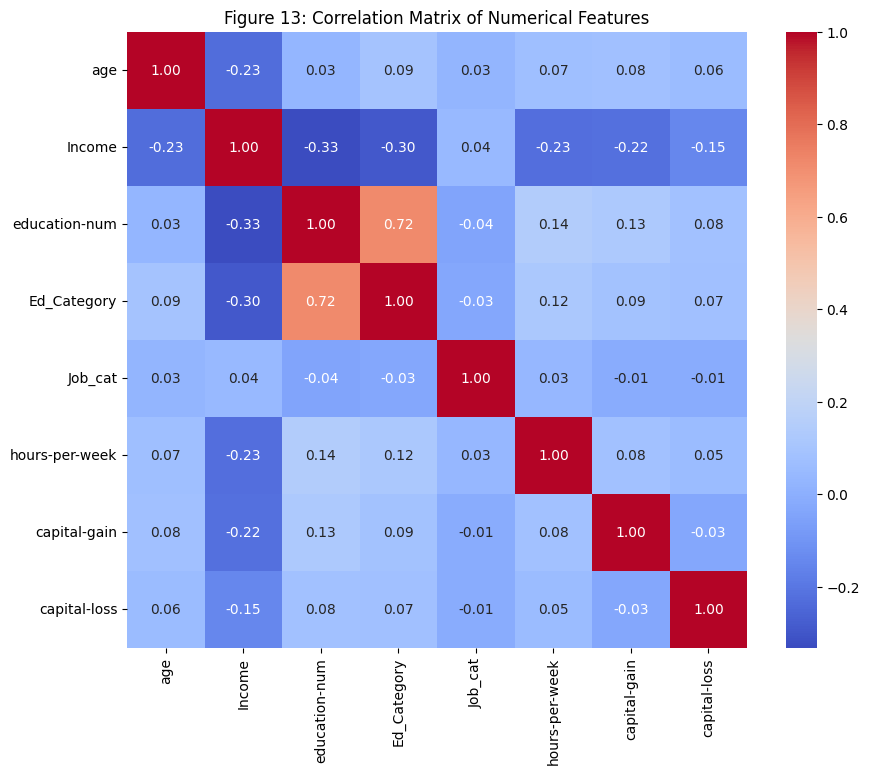

In [131]:
# Correaltion Plot:
num_col = ['age',"Income", 'education-num',"Ed_Category", 'Job_cat', 'hours-per-week', 'capital-gain', 'capital-loss']

#Coorealtion Matrix:
corr_matrix = DF[num_col].corr()

# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 13: Correlation Matrix of Numerical Features')
plt.show()

In [132]:
#Calculate VIF for each variable
numeric_columns = DF[num_col]

vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

# VIF results
print(vif_data)

         Variable        VIF
0             age   7.495435
1          Income   3.763040
2   education-num  20.579135
3     Ed_Category   4.909036
4         Job_cat   4.719357
5  hours-per-week  10.183012
6    capital-gain   1.085591
7    capital-loss   1.077435


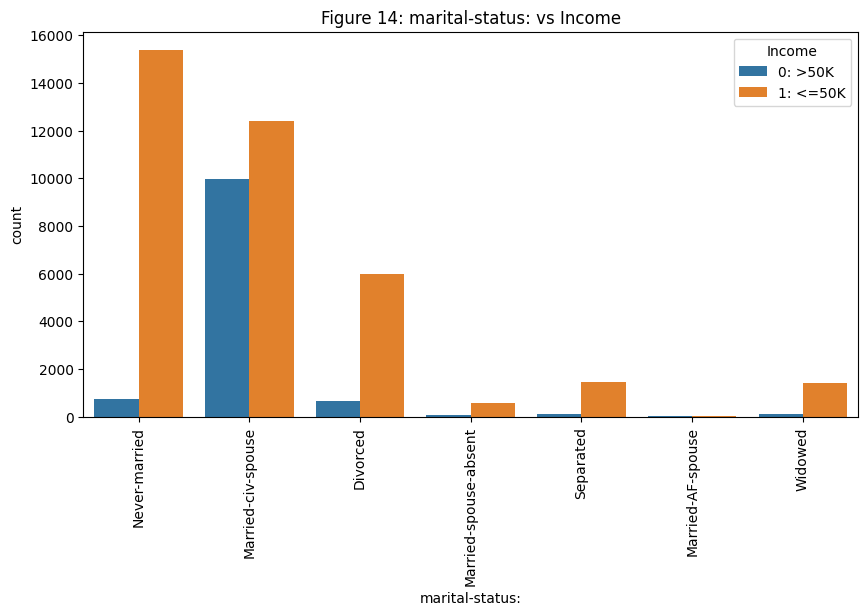

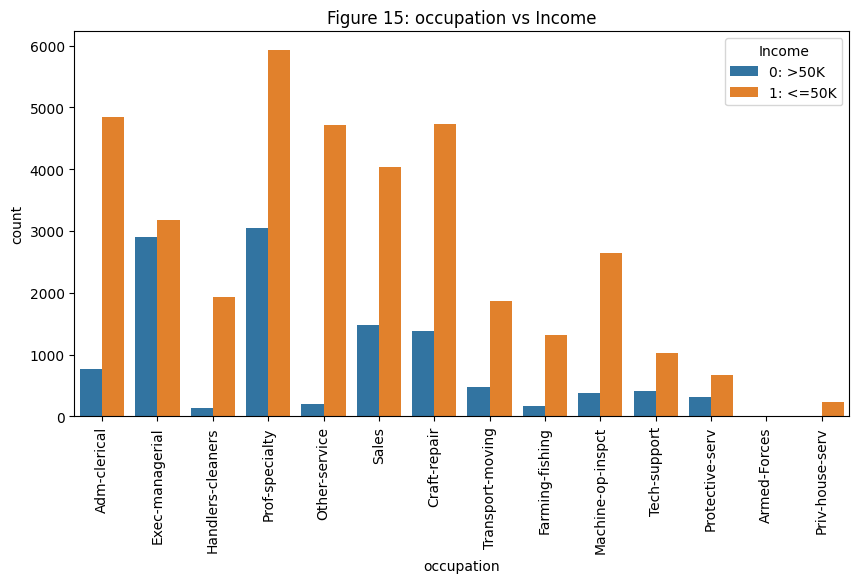

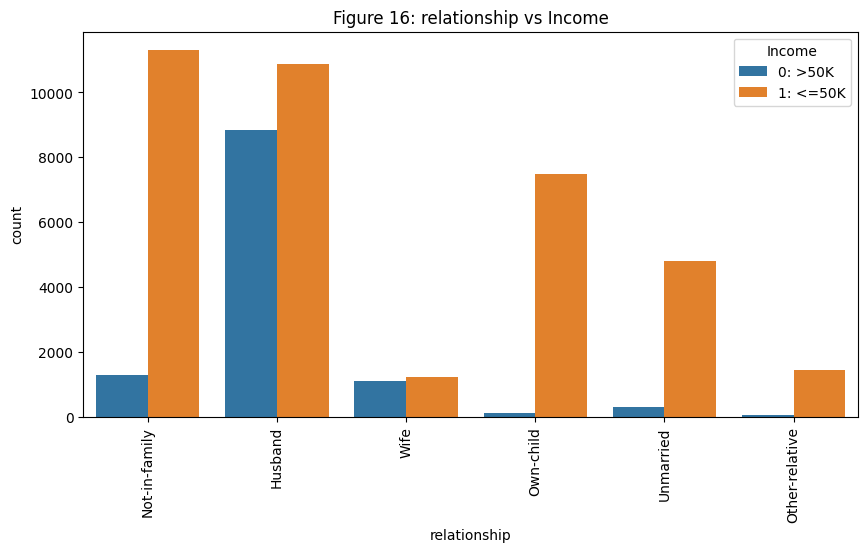

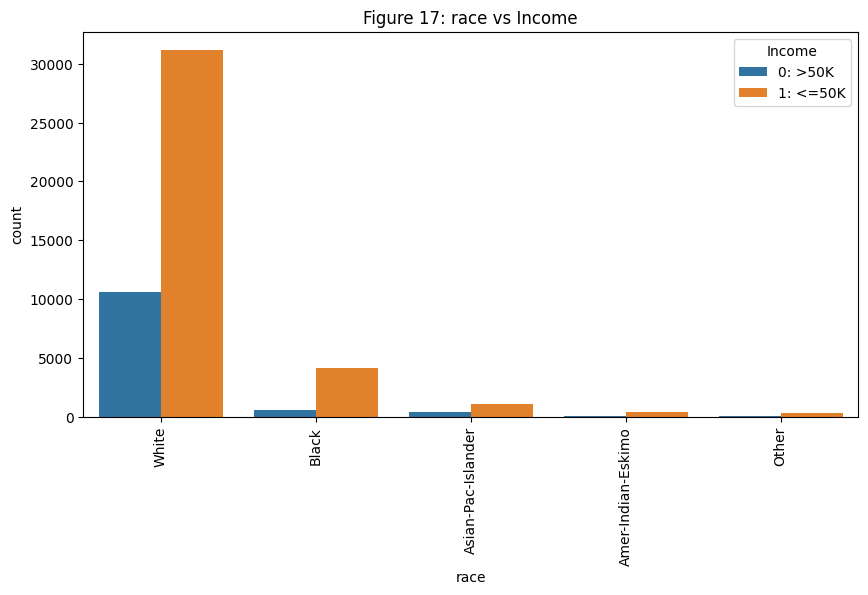

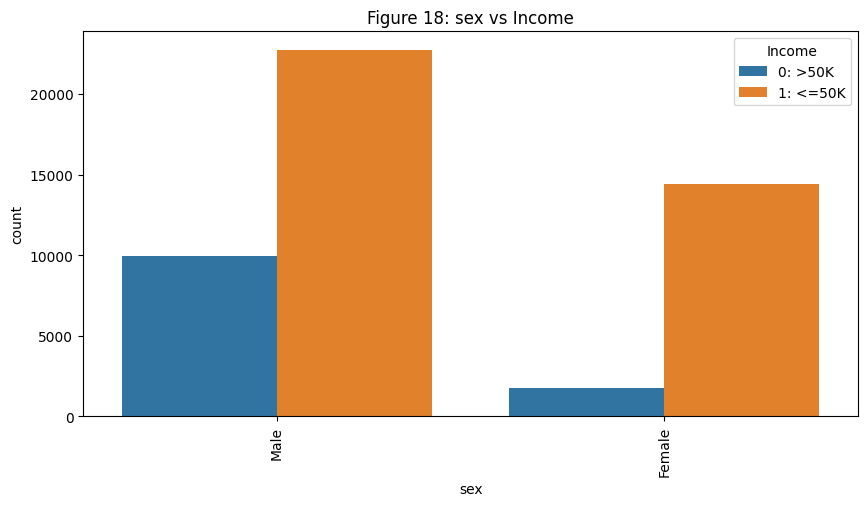

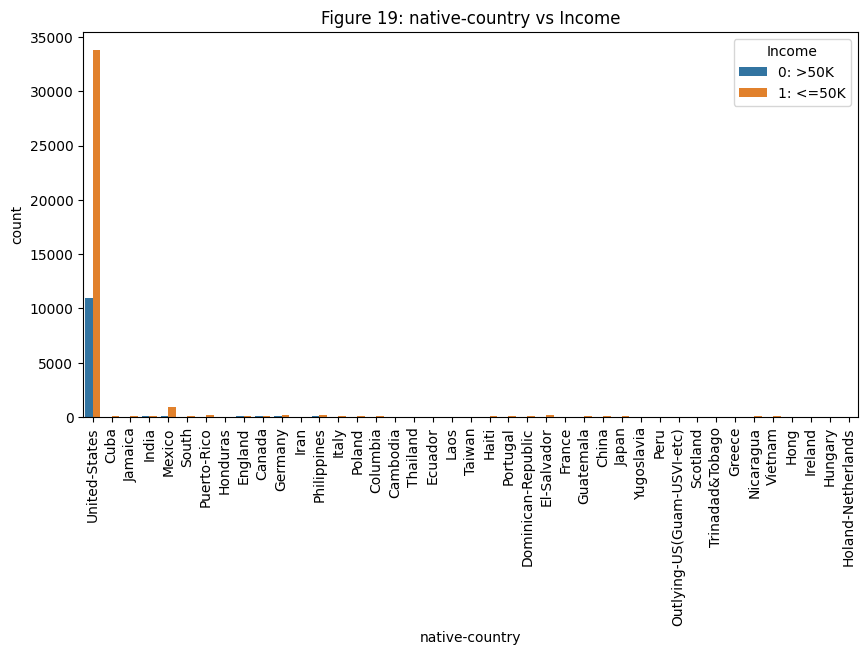

In [108]:
# Relation between categorical variable and Income
# Categorical columns to visualize
categorical_cols = ['marital-status:', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Creating bar charts to visualize the relationships
for i, col in enumerate(categorical_cols, 14):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=DF, x=col, hue='Income')
    plt.title(f'Figure {i}: {col} vs Income')
    plt.xticks(rotation=90)
    plt.legend(title='Income', loc='upper right', labels=['0: >50K', '1: <=50K'])
    plt.show()  
    


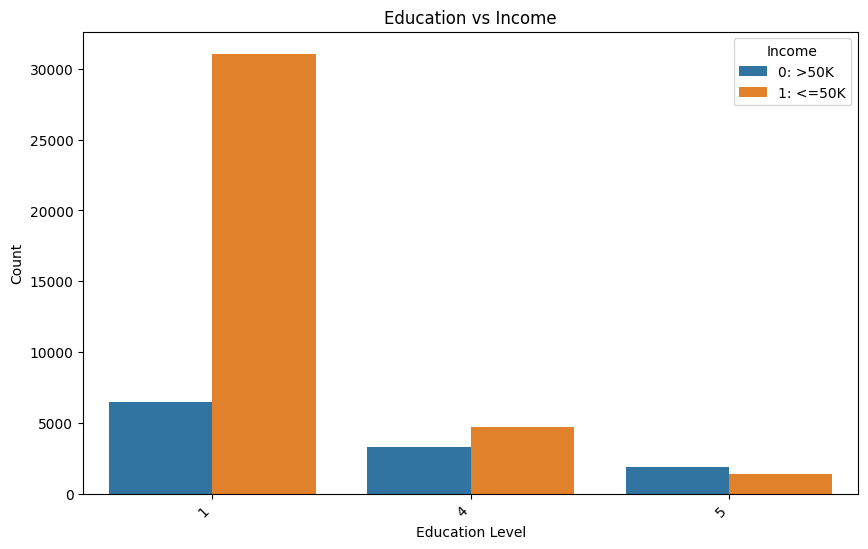

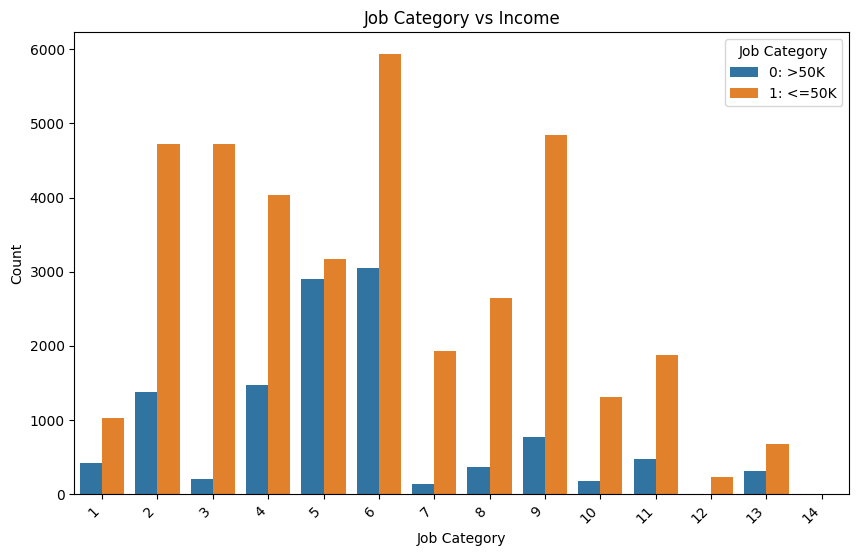

In [133]:
# Relationship between Education category vs Income

plt.figure(figsize=(10, 6))
sns.countplot(data=DF, x='Ed_Category', hue='Income')
plt.title('Education vs Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right', labels=['0: >50K', '1: <=50K'])
plt.show()

# Relationship between Occupation(Job category) vs Income
plt.figure(figsize=(10, 6))
sns.countplot(data=DF, x='Job_cat', hue='Income')
plt.title('Job Category vs Income')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Category', loc='upper right', labels=['0: >50K', '1: <=50K'])
plt.show()

In [134]:
# Modelling 

# Technique 1- one-hot encoding

# Feature and target selection
X = DF.drop(['education', 'occupation', 'capital-gain', 'capital-loss', 'Income'], axis=1)
Y = DF['Income']

# Encoding the categorical features
X = pd.get_dummies(X)

# Splitting the data into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23, stratify=Y)

# Checking the shapes of the training set and the test set
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((39073, 76), (9769, 76), (39073,), (9769,))

In [135]:
# Normalization

scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(X_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(X_test) # the scaler is applied to the test set

In [136]:
# Randomly selecting K values for model 1
K_val = [3, 6, 9]

# Creating and evaluating KNN models for each K value
for K in K_val:
    # Creating the KNN model
    K_model = KNeighborsClassifier(n_neighbors=K)
    
    # Training the model
    K_model.fit(X_train, Y_train)
    
    # Making predictions on the test set
    pred_Y = K_model.predict(X_test)
    
    # Evaluating the model
    accuracy = accuracy_score(Y_test, pred_Y)
    
    print(f'KNN model with K={K} has an accuracy of {accuracy:.4f}')

KNN model with K=3 has an accuracy of 0.9415
KNN model with K=6 has an accuracy of 0.9382
KNN model with K=9 has an accuracy of 0.9378


In [137]:
#Modelling technique 2
#Feature and target selection
T = DF[['age', 'Job_cat', 'Ed_Category']]
P = DF['Income']

# Splitting the data into a training set and a test set
T_train, T_test, P_train, P_test = train_test_split(T, P, test_size=0.2, random_state=23, stratify=P)

# Checking the shapes of the training set and the test set
T_train.shape, T_test.shape, P_train.shape, P_test.shape

((39073, 3), (9769, 3), (39073,), (9769,))

In [138]:
#Randomly selecting K values for model 2
K_val = [3, 6, 9]

# Creating and evaluating KNN models for each K value
for K in K_val:
    # Creating the KNN model
    K_model_2 = KNeighborsClassifier(n_neighbors=K)
    
    # Training the model
    K_model_2.fit(T_train, P_train)
    
    # Making predictions on the test set
    pred_P = K_model_2.predict(T_test)
    
    # Evaluating the model
    accuracy = accuracy_score(P_test, pred_P)
    
    print(f'KNN model with K={K} has an accuracy of {accuracy:.4f}')

KNN model with K=3 has an accuracy of 0.7543
KNN model with K=6 has an accuracy of 0.7480
KNN model with K=9 has an accuracy of 0.7770
